**Creating CNN model for accent recognitions**

In [0]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
from numpy import asarray
from PIL import Image
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
import os
from tensorflow.data import Dataset as ds
from tensorflow.keras.utils import Sequence
import math
from tensorflow.keras.callbacks import ModelCheckpoint

creating Sequence for data generations


In [0]:
class Image_bath_gen(Sequence):
  def __init__(self, X, Y, batch_size):
    self.data = X
    self.lables = Y
    self.batch_size =  batch_size
  
  def __len__(self):
    return math.ceil(self.data.shape[0]/self.batch_size)

  def __getitem__(self, idx):
    batch_x = self.data[idx * self.batch_size:(idx + 1) *
    self.batch_size]
    batch_y = self.lables[idx * self.batch_size:(idx + 1) *
    self.batch_size]

    return np.array([imread(filename)/255 for filename in batch_x]), np.array(batch_y)

In [0]:
#data_dir = "/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/spectogram data/"
#data_shape = imread(data_dir + "cutted_data_0_0.png").shape

Loading data

In [0]:
true_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/true data 2.csv")

In [13]:
train_data = true_data.iloc[:-int(true_data.shape[0]*0.1)]
train_data.shape

(36175, 2)

In [14]:
test_data = true_data.iloc[-int(true_data.shape[0]*0.1):]
test_data.head()

,filename,lable
36175,/content/drive/My Drive/Colab Notebooks/new pr...,0
36176,/content/drive/My Drive/Colab Notebooks/new pr...,0
36177,/content/drive/My Drive/Colab Notebooks/new pr...,0
36178,/content/drive/My Drive/Colab Notebooks/new pr...,0
36179,/content/drive/My Drive/Colab Notebooks/new pr...,0


In [0]:
test_data_gen = Image_bath_gen(test_data["filename"], test_data["lable"], 128)

In [0]:
meta_data_gen = Image_bath_gen(train_data["filename"], train_data["lable"], 128)

In [17]:
data_shape = imread(train_data.iloc[0][0]).shape
print(data_shape)

(187, 187, 4)


Creating CNN model

In [0]:
model = Sequential()

model.add(Conv2D(128, (3, 3), activation='relu', input_shape = data_shape, padding="same"))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(34, (2, 2), activation='relu',padding="same" ))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(16, (2, 2), activation='relu',padding="same"))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(70, "relu"))
model.add(Dense(70, "relu"))
model.add(Dense(50, "relu"))


model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile("adam", 'binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 187, 187, 128)     4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 94, 94, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 94, 94, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 34)        8

Loading saved model


In [0]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/My Drive/Colab Notebooks/new project/afDiploma 2.h5")

In [0]:
#model.fit(meta_data_gen, epochs= 20, callbacks=[ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/new project/afDiploma 2.h5")])

This accuracy we geted by basing on splited data, Let's check accuracy of hole audio file

In [25]:
model.evaluate(test_data_gen)

32/32 [==============================] - 1478s 46s/step - loss: 0.7021 - accuracy: 0.6984


[0.7021034955978394, 0.698432445526123]

**Accuracy of hole audio file**

the main idea of calculating of accuracy of hole data is predicting class of each fragment and calculate mean value for hole file

In [0]:
cp = []
non_cp = []
for i in range(test_data.shape[0]):
  if i % 2 == 0:
    cp.append(test_data.iloc[i].values)
  else:
    non_cp.append(test_data.iloc[i].values)

In [0]:
new_test_data = np.concatenate((cp, non_cp))

In [29]:
new_test_data = df(new_test_data)
new_test_data.head()

,0,1
0,/content/drive/My Drive/Colab Notebooks/new pr...,0
1,/content/drive/My Drive/Colab Notebooks/new pr...,0
2,/content/drive/My Drive/Colab Notebooks/new pr...,0
3,/content/drive/My Drive/Colab Notebooks/new pr...,0
4,/content/drive/My Drive/Colab Notebooks/new pr...,1


In [31]:
test_data["filename"].head()

36175    /content/drive/My Drive/Colab Notebooks/new pr...
36176    /content/drive/My Drive/Colab Notebooks/new pr...
36177    /content/drive/My Drive/Colab Notebooks/new pr...
36178    /content/drive/My Drive/Colab Notebooks/new pr...
36179    /content/drive/My Drive/Colab Notebooks/new pr...
Name: filename, dtype: object

In [35]:
new_test_data[0] = new_test_data[0].astype(str)
new_test_data[1] = new_test_data[1].astype(int)
new_test_data.dtypes

0    object
1     int64
dtype: object

In [0]:
new_test_data_gen = Image_bath_gen(new_test_data[0], new_test_data[1], 128)

In [38]:
model.evaluate(new_test_data_gen)

32/32 [==============================] - 172s 5s/step - loss: 0.7021 - accuracy: 0.6984


[0.7021036148071289, 0.698432445526123]

In [0]:
#[i[98:-4].split('_') for i in  new_test_data[0]][1800:]

In [40]:
gig = []
for i in new_test_data[0].values:
  element = i[98:-4].split('_')
  if 'cp' in element:
    gig.append(''.join([element[0],element[2]]))
  else:
    gig.append(''.join([element[0]]))
gig[:5]

['121cp', '121cp', '121cp', '121cp', '122cp']

In [42]:
counts = np.unique(gig, return_counts=True)
counts

(array(['0', '0cp', '1', '10', '100', '100cp', '101', '101cp', '102',
        '102cp', '103', '103cp', '104', '104cp', '105', '105cp', '106',
        '106cp', '107', '107cp', '108', '108cp', '109', '109cp', '10cp',
        '11', '110', '110cp', '111', '111cp', '11cp', '12', '121', '121cp',
        '122', '122cp', '123', '123cp', '124', '124cp', '129', '129cp',
        '12cp', '13', '130', '130cp', '131', '131cp', '132', '132cp',
        '133', '133cp', '134', '134cp', '135', '135cp', '136', '136cp',
        '13cp', '14', '14cp', '15', '15cp', '16', '16cp', '17', '17cp',
        '18', '18cp', '19', '19cp', '1cp', '2', '20', '20cp', '21', '21cp',
        '22', '22cp', '23', '23cp', '24', '24cp', '25', '25cp', '26',
        '26cp', '27', '27cp', '28', '28cp', '29', '29cp', '2cp', '3', '30',
        '30cp', '31', '31cp', '32', '32cp', '33', '33cp', '34', '34cp',
        '35', '35cp', '36', '36cp', '37', '37cp', '38', '38cp', '39',
        '39cp', '3cp', '4', '40', '40cp', '41', '41cp', '42

In [43]:
sum(counts[1])

4019

In [0]:
new_teoire = np.array([counts[0], counts[1]]).T

In [45]:
new_teorie = df(new_teoire)
new_teorie

,0,1
0,0,17
1,0cp,17
2,1,7
3,10,10
4,100,5
...,...,...
237,98,15
238,98cp,15
239,99,25
240,99cp,25


In [46]:
test_data.head()

,filename,lable
36175,/content/drive/My Drive/Colab Notebooks/new pr...,0
36176,/content/drive/My Drive/Colab Notebooks/new pr...,0
36177,/content/drive/My Drive/Colab Notebooks/new pr...,0
36178,/content/drive/My Drive/Colab Notebooks/new pr...,0
36179,/content/drive/My Drive/Colab Notebooks/new pr...,0


In [48]:
sam = df(np.unique(gig, return_counts=True))
sam.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241
0,0,0cp,1,10,100,100cp,101,101cp,102,102cp,103,103cp,104,104cp,105,105cp,106,106cp,107,107cp,108,108cp,109,109cp,10cp,11,110,110cp,111,111cp,11cp,12,121,121cp,122,122cp,123,123cp,124,124cp,...,79cp,7cp,8,80,80cp,81,81cp,82,82cp,83,83cp,84,84cp,85,85cp,86,86cp,8cp,9,90,90cp,91,91cp,92,92cp,93,93cp,94,94cp,95,95cp,96,96cp,97,97cp,98,98cp,99,99cp,9cp
1,17,17,7,10,5,5,14,14,20,20,24,24,15,15,9,9,12,12,17,17,23,23,17,17,10,28,17,17,16,16,28,22,3,4,20,20,12,12,5,4,...,6,17,18,17,17,21,21,11,11,10,10,13,13,13,13,24,24,18,14,17,17,20,20,13,13,5,5,8,8,16,16,7,7,22,22,15,15,25,25,14


In [49]:
np.unique(counts, return_counts=True)

(array(['0', '0cp', '1', '10', '100', '100cp', '101', '101cp', '102',
        '102cp', '103', '103cp', '104', '104cp', '105', '105cp', '106',
        '106cp', '107', '107cp', '108', '108cp', '109', '109cp', '10cp',
        '11', '110', '110cp', '111', '111cp', '11cp', '12', '121', '121cp',
        '122', '122cp', '123', '123cp', '124', '124cp', '129', '129cp',
        '12cp', '13', '130', '130cp', '131', '131cp', '132', '132cp',
        '133', '133cp', '134', '134cp', '135', '135cp', '136', '136cp',
        '13cp', '14', '14cp', '15', '15cp', '16', '16cp', '17', '17cp',
        '18', '18cp', '19', '19cp', '1cp', '2', '20', '20cp', '21', '21cp',
        '22', '22cp', '23', '23cp', '24', '24cp', '25', '25cp', '26',
        '26cp', '27', '27cp', '28', '28cp', '29', '29cp', '2cp', '3', '30',
        '30cp', '31', '31cp', '32', '32cp', '33', '33cp', '34', '34cp',
        '35', '35cp', '36', '36cp', '37', '37cp', '38', '38cp', '39',
        '39cp', '3cp', '4', '40', '40cp', '41', '41cp', '42

In [50]:
len(counts)

2

In [51]:
tr_cp = []
non_tr_cp = []
for i in range(train_data.shape[0]):
  if i % 2 == 0:
    tr_cp.append(train_data.iloc[i].values)
  else:
    non_tr_cp.append(train_data.iloc[i].values)
new_train_data = np.concatenate((tr_cp, non_tr_cp))
new_train_data = df(new_train_data)
new_train_data.head()

,0,1
0,/content/drive/My Drive/Colab Notebooks/new pr...,0
1,/content/drive/My Drive/Colab Notebooks/new pr...,0
2,/content/drive/My Drive/Colab Notebooks/new pr...,0
3,/content/drive/My Drive/Colab Notebooks/new pr...,0
4,/content/drive/My Drive/Colab Notebooks/new pr...,0


In [52]:
new_train_data.shape

(36175, 2)

In [53]:
gig2 = []
for i in new_train_data[0].values:
  element = i[98:-4].split('_')
  if 'cp' in element:
    gig2.append(''.join([element[0],element[2]]))
  else:
    gig2.append(''.join([element[0]]))
gig2[:5]

['1093cp', '1093cp', '1093cp', '1093cp', '1093cp']

In [0]:
count2 = np.unique(gig2, return_counts=True)[1]

In [55]:
count2

array([24, 24, 21, ..., 17, 26, 26])

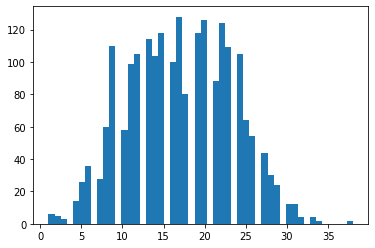

In [56]:
import matplotlib.pyplot as plt
plt.hist(count2, 50)
plt.show()

In [58]:
gig_true = []
cache = []
for i in gig:
  if i not in gig_true:
    gig_true.append(i)

gig_true[:5]


['121cp', '122cp', '123cp', '124cp', '99cp']

In [60]:
counts
counts_dict = {}
for i in range(len(counts[0])):
  counts_dict[counts[0][i]] = counts[1][i]
counts_dict

{'0': 17,
 '0cp': 17,
 '1': 7,
 '10': 10,
 '100': 5,
 '100cp': 5,
 '101': 14,
 '101cp': 14,
 '102': 20,
 '102cp': 20,
 '103': 24,
 '103cp': 24,
 '104': 15,
 '104cp': 15,
 '105': 9,
 '105cp': 9,
 '106': 12,
 '106cp': 12,
 '107': 17,
 '107cp': 17,
 '108': 23,
 '108cp': 23,
 '109': 17,
 '109cp': 17,
 '10cp': 10,
 '11': 28,
 '110': 17,
 '110cp': 17,
 '111': 16,
 '111cp': 16,
 '11cp': 28,
 '12': 22,
 '121': 3,
 '121cp': 4,
 '122': 20,
 '122cp': 20,
 '123': 12,
 '123cp': 12,
 '124': 5,
 '124cp': 4,
 '129': 1,
 '129cp': 1,
 '12cp': 22,
 '13': 13,
 '130': 32,
 '130cp': 32,
 '131': 23,
 '131cp': 23,
 '132': 20,
 '132cp': 20,
 '133': 18,
 '133cp': 18,
 '134': 17,
 '134cp': 17,
 '135': 17,
 '135cp': 17,
 '136': 2,
 '136cp': 1,
 '13cp': 13,
 '14': 15,
 '14cp': 15,
 '15': 13,
 '15cp': 13,
 '16': 20,
 '16cp': 20,
 '17': 20,
 '17cp': 20,
 '18': 14,
 '18cp': 14,
 '19': 17,
 '19cp': 17,
 '1cp': 7,
 '2': 28,
 '20': 19,
 '20cp': 19,
 '21': 16,
 '21cp': 16,
 '22': 22,
 '22cp': 22,
 '23': 13,
 '23cp': 13,


In [0]:
sequ = [counts_dict[i] for i in gig_true]

In [62]:
new_test_data.head(20).values

array([['/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/spectogram data/cutted_data_121_11_cp.png',
        0],
       ['/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/spectogram data/cutted_data_121_12_cp.png',
        0],
       ['/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/spectogram data/cutted_data_121_13_cp.png',
        0],
       ['/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/spectogram data/cutted_data_121_14_cp.png',
        0],
       ['/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/spectogram data/cutted_data_122_0_cp.png',
        1],
       ['/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/spectogram data/cutted_data_122_1_cp.png',
        1],
       ['/content/drive/My Drive/Colab Notebooks/new project/new data/new idea/spectogram data/cutted_data_122_2_cp.png',
        1],
       ['/content/drive/My Drive/Colab Notebooks/new proje

In [67]:
new_test_data[0]

0       /content/drive/My Drive/Colab Notebooks/new pr...
1       /content/drive/My Drive/Colab Notebooks/new pr...
2       /content/drive/My Drive/Colab Notebooks/new pr...
3       /content/drive/My Drive/Colab Notebooks/new pr...
4       /content/drive/My Drive/Colab Notebooks/new pr...
                              ...                        
4014    /content/drive/My Drive/Colab Notebooks/new pr...
4015    /content/drive/My Drive/Colab Notebooks/new pr...
4016    /content/drive/My Drive/Colab Notebooks/new pr...
4017    /content/drive/My Drive/Colab Notebooks/new pr...
4018    /content/drive/My Drive/Colab Notebooks/new pr...
Name: 0, Length: 4019, dtype: object

In [0]:
new_test_data_gen = Image_bath_gen(new_test_data[0], new_test_data[1], 128)

In [69]:
model.evaluate(new_test_data_gen)

32/32 [==============================] - 172s 5s/step - loss: 0.7021 - accuracy: 0.6984


[0.7021036148071289, 0.698432445526123]

In [0]:
classes = model.predict_classes(new_test_data_gen)

In [0]:
true_data = new_test_data[1].values

In [0]:
j = 0
predicted = []
true = []
for i in sequ:
  predicted.append(sum(classes[j:j+i])[0]/i)
  true.append(sum(true_data[j:j+i]/i))
  j += i

In [0]:
predicted = [1 if i > 0.5 else 0 for i in predicted]

In [0]:
true = [1 if i > 0.5 else 0 for i in true]

The accuracy of hole file


In [89]:
from sklearn.metrics import accuracy_score as acc
acc(true, predicted)

0.7107438016528925